# Credit Card Fraud Detection - Logistic Regression

Importing the Dependencies

In [57]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [58]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('creditcard.csv')

In [59]:
# first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [60]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [61]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [62]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [63]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

This Dataset is highly unblanced

0 --> Normal Transaction

1 --> fraudulent transaction

In [64]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [65]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [66]:
# statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [67]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [68]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Under-Sampling

Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions

Number of Fraudulent Transactions --> 492

In [69]:
legit_sample = legit.sample(n=492)

Concatenating two DataFrames

In [70]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [71]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
162922,115487.0,-2.224231,1.437810,0.239460,1.276103,3.326879,2.132598,2.191389,-0.954529,-0.707954,...,0.054095,0.577494,-0.218139,-0.964030,-0.077351,-0.408739,-2.490278,-0.262782,0.00,0
149371,91098.0,-0.259693,1.242553,-0.745445,-0.311640,0.765459,-0.754018,0.502015,0.269069,1.133142,...,-0.451481,-1.107375,0.173146,0.297994,-0.397640,0.089030,0.064457,-0.000168,17.98,0
129224,79000.0,1.224094,0.028820,-0.467444,-0.130387,0.336720,-0.395497,0.412340,-0.204105,-0.159904,...,-0.372109,-1.166310,0.023090,-0.715551,0.246061,0.778352,-0.098747,-0.001798,59.95,0
121013,76043.0,1.463467,-1.201647,0.650282,-1.492648,-1.674180,-0.327031,-1.372595,0.050501,-1.752650,...,-0.017212,0.284053,-0.068316,-0.018366,0.355837,-0.078886,0.040260,0.012913,21.00,0
54229,46348.0,-1.077034,0.609216,1.166005,1.213573,-0.297257,0.140110,-0.111233,0.673860,-0.357944,...,0.319290,0.720312,0.057957,-0.292671,-0.307940,-0.155816,0.311101,0.104754,80.00,0


In [72]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [73]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [74]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,93877.886179,0.014769,0.016201,0.010210,0.057212,0.022548,0.060578,-0.029623,0.058628,0.032615,...,0.009187,-0.033090,-0.043953,-0.024853,-0.036179,0.021448,-0.015357,0.014873,-0.018505,84.905915
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Splitting the data into Features & Targets

In [75]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [76]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
162922  115487.0 -2.224231  1.437810  0.239460  1.276103  3.326879  2.132598   
149371   91098.0 -0.259693  1.242553 -0.745445 -0.311640  0.765459 -0.754018   
129224   79000.0  1.224094  0.028820 -0.467444 -0.130387  0.336720 -0.395497   
121013   76043.0  1.463467 -1.201647  0.650282 -1.492648 -1.674180 -0.327031   
54229    46348.0 -1.077034  0.609216  1.166005  1.213573 -0.297257  0.140110   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [77]:
print(Y)

162922    0
149371    0
129224    0
121013    0
54229     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [78]:
from sklearn.preprocessing import RobustScaler

# Columns to scale (Time, Amount, and all V-features)
# Using RobustScaler is often preferred for data with potential outliers like Amount
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X) 
X = pd.DataFrame(X_scaled, columns=X.columns)

# From now on, your split (Cell 24) will use the scaled X

Split the data into Training data & Testing Data

In [79]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [80]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


Model Training

Logistic Regression

In [81]:
model = LogisticRegression()

In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# (Cell 26) Define the model and parameter grid
model = LogisticRegression(solver='liblinear', random_state=2)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 
              'max_iter': [1000]} 

# Use GridSearchCV to find the best model
grid_search = GridSearchCV(
    estimator=model, 
    param_grid=param_grid, 
    scoring='recall', 
    cv=5 
)

# (Cell 27) Fit the grid search using your already balanced training data!
# This is the line that runs silently, fitting 30 models.
grid_search.fit(X_train, Y_train)

# --------------------------------------------------------------------------
# 🌟 ADD THESE LINES TO PRINT THE RESULTS! 🌟
# --------------------------------------------------------------------------

print("GridSearchCV Completed!")
print("-" * 30)
print(f"Best Hyperparameter (C value): {grid_search.best_params_['C']}")
print(f"Best Cross-Validation Recall Score: {grid_search.best_score_:.4f}")

# Find the best model
best_model = grid_search.best_estimator_

# Use the best model for prediction (This X_test_prediction variable is crucial for final evaluation)
X_test_prediction = best_model.predict(X_test)

GridSearchCV Completed!
------------------------------
Best Hyperparameter (C value): 10
Best Cross-Validation Recall Score: 0.9240


Model Evaluation

Accuracy Score

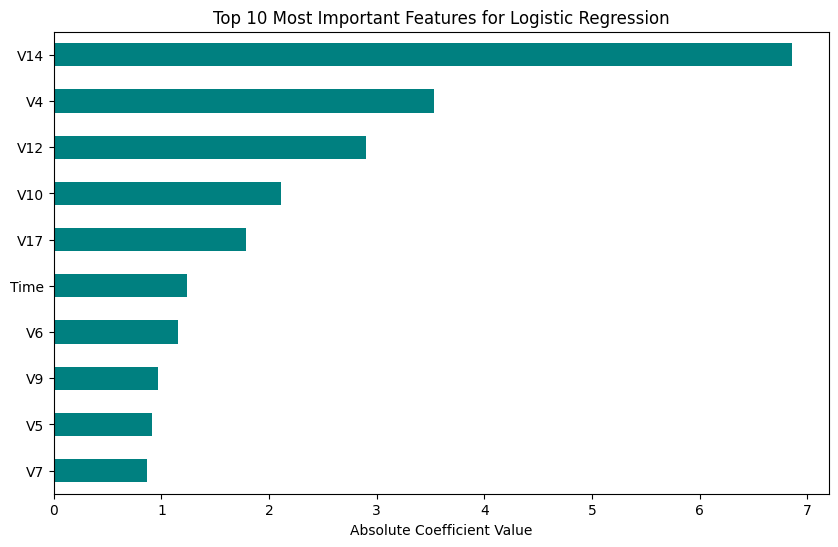

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'best_model' is defined from your GridSearchCV step

# Calculate absolute value of coefficients (importance)
feature_importance = pd.Series(
    best_model.coef_[0], 
    index=X_train.columns
).abs().sort_values(ascending=False)

# Plot the top 10 most important features
plt.figure(figsize=(10, 6))
feature_importance.head(10).plot(kind='barh', color='teal')
plt.title('Top 10 Most Important Features for Logistic Regression')
plt.xlabel('Absolute Coefficient Value')
plt.gca().invert_yaxis()
plt.show()

In [84]:
# accuracy on training data
X_train_prediction = best_model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [85]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.96569250317662


In [86]:
# accuracy on test data
X_test_prediction = best_model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [87]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9187817258883249


In [88]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# --- Calculate and Print Accuracy (Already in your notebook, but included for completeness) ---
test_accuracy = accuracy_score(Y_test, X_test_prediction)
print(f"Accuracy Score: {test_accuracy:.4f}\n")

# --- 1. Confusion Matrix ---
conf_matrix = confusion_matrix(Y_test, X_test_prediction)
print("Confusion Matrix:\n")
# The output is a 2x2 array: [[TN, FP], [FN, TP]]
print(conf_matrix)

# Interpretation:
# TN (Top-Left): True Negatives (Correctly predicted normal transactions)
# FP (Top-Right): False Positives (Incorrectly predicted normal transactions as fraud)
# FN (Bottom-Left): False Negatives (Incorrectly predicted fraud as normal - THE WORST)
# TP (Bottom-Right): True Positives (Correctly predicted fraudulent transactions)

print("\n" + "="*50 + "\n")

# --- 2. Precision, Recall, and F1-Score ---
# The classification_report provides all three metrics for both classes (0 and 1)
class_report = classification_report(Y_test, X_test_prediction, target_names=['Normal (0)', 'Fraud (1)'])

print("Classification Report (Precision, Recall, F1-Score):\n")
print(class_report)

# Key values from the report:
# Precision (Fraud/Class 1): How many predicted fraud cases were actually fraud.
# Recall (Fraud/Class 1): How many actual fraud cases were caught (This is the most critical metric).
# F1-Score (Fraud/Class 1): The harmonic mean of Precision and Recall.

Accuracy Score: 0.9188

Confusion Matrix:

[[93  6]
 [10 88]]


Classification Report (Precision, Recall, F1-Score):

              precision    recall  f1-score   support

  Normal (0)       0.90      0.94      0.92        99
   Fraud (1)       0.94      0.90      0.92        98

    accuracy                           0.92       197
   macro avg       0.92      0.92      0.92       197
weighted avg       0.92      0.92      0.92       197



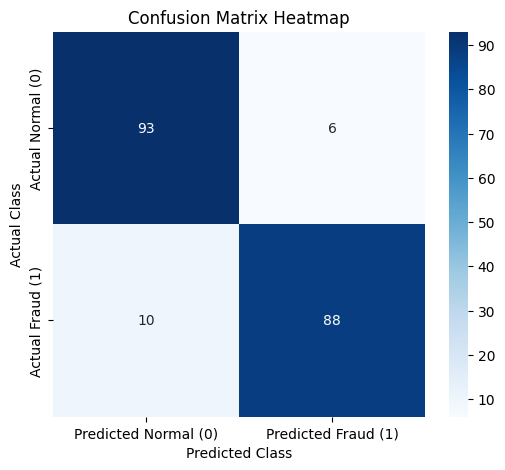

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate the Confusion Matrix
cm = confusion_matrix(Y_test, X_test_prediction)

# Create the visualization
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Predicted Normal (0)', 'Predicted Fraud (1)'], 
            yticklabels=['Actual Normal (0)', 'Actual Fraud (1)'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

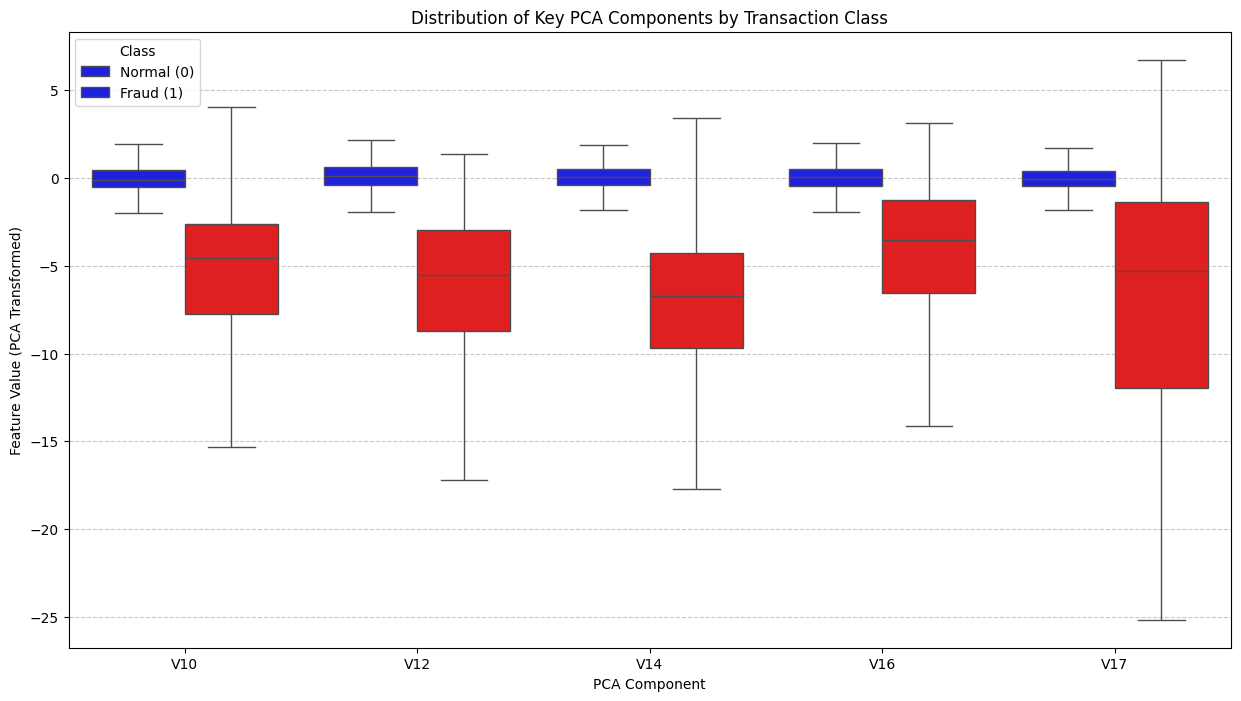

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Note: This code assumes the 'credit_card_data' DataFrame has been loaded 
# or created (as shown in the mock data setup).

# Select features commonly highly correlated with fraud (V10, V12, V14, V16, V17)
features_to_plot = ['V10', 'V12', 'V14', 'V16', 'V17']

# Reshape the data for easier plotting
plot_data = credit_card_data.loc[:, ['Class'] + features_to_plot].melt(
    id_vars='Class',
    var_name='Variable',
    value_name='Value'
)

# Create the Box Plot visualization
plt.figure(figsize=(15, 8))
sns.boxplot(
    x='Variable', 
    y='Value', 
    hue='Class', 
    data=plot_data, 
    palette={0: "blue", 1: "red"},
    showfliers=False # Hide outliers to focus on the central 50% of the data
)

plt.title('Distribution of Key PCA Components by Transaction Class')
plt.xlabel('PCA Component')
plt.ylabel('Feature Value (PCA Transformed)')
plt.legend(title='Class', labels=['Normal (0)', 'Fraud (1)'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show() 
# Save the figure if running in a script: plt.savefig('box_plots_v_features.png')

In [91]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# --- A. Training the Random Forest Model ---

# Initialize and train the Random Forest model
# Note: n_jobs=-1 uses all your computer cores to speed up training
rf_model = RandomForestClassifier(n_estimators=100, random_state=2, n_jobs=-1)

# Train on the same balanced training data
rf_model.fit(X_train, Y_train)

# --- B. Prediction and Evaluation ---

# Make predictions on the unseen test data
rf_predictions = rf_model.predict(X_test)

# Report the Classification Report for the Random Forest model
print("-" * 40)
print("Random Forest Model Comparison Results")
print(f"Accuracy Score: {accuracy_score(Y_test, rf_predictions):.4f}")

# Report the final metrics (Focus on Recall/Precision for Fraud)
print("\nClassification Report (Random Forest Test Data):")
print(classification_report(Y_test, rf_predictions, target_names=['Normal (0)', 'Fraud (1)']))
print("-" * 40)

----------------------------------------
Random Forest Model Comparison Results
Accuracy Score: 0.9340

Classification Report (Random Forest Test Data):
              precision    recall  f1-score   support

  Normal (0)       0.90      0.98      0.94        99
   Fraud (1)       0.98      0.89      0.93        98

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197

----------------------------------------


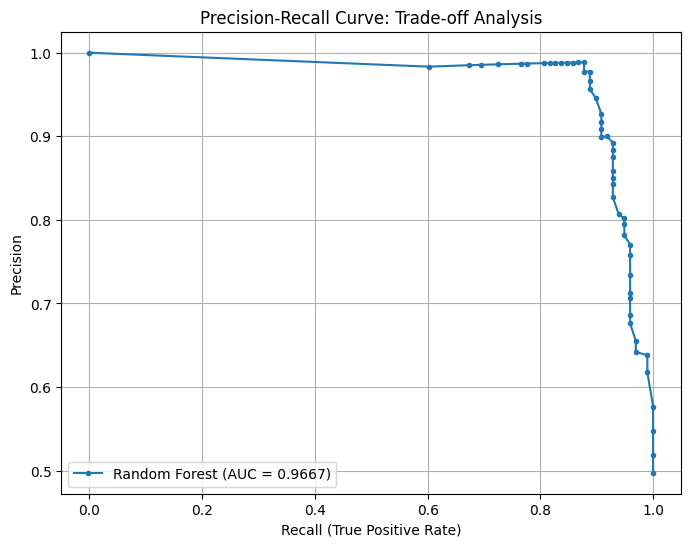

In [92]:

from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# 1. Get probability scores for the positive class (Fraud=1)
# Use your best model, which is the Random Forest model (rf_model)
y_scores = rf_model.predict_proba(X_test)[:, 1]

# 2. Calculate the curve points
precision, recall, thresholds = precision_recall_curve(Y_test, y_scores)
pr_auc = auc(recall, precision)

# 3. Plot the curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'Random Forest (AUC = {pr_auc:.4f})')
plt.title('Precision-Recall Curve: Trade-off Analysis')
plt.xlabel('Recall (True Positive Rate)')
plt.ylabel('Precision')
plt.grid(True)
plt.legend()
plt.show()

In [95]:
import joblib
# Assuming 'rf_model' is your final trained Random Forest model
joblib.dump(rf_model, 'final_fraud_model.joblib') 
print("Model saved as final_fraud_model.joblib")

Model saved as final_fraud_model.joblib


In [96]:
import joblib 
# Assuming 'scaler' is your RobustScaler object from the preprocessing step
joblib.dump(scaler, 'fraud_scaler.joblib')

['fraud_scaler.joblib']